In [2]:
# A check to see if environment variables are setup correctly:
import sys, math, random, ROOT, uproot, torch
import numpy as np

In [3]:
# now do stuff:
signal_file = ROOT.TFile("formatted/tau_signal.root")
signal_tree = signal_file.Get("signal")

background_file = ROOT.TFile("formatted/background.root")
background_tree = background_file.Get("background")

signal_entries = signal_tree.GetEntries()
background_entries = background_tree.GetEntries()
print(signal_entries)
print(background_entries)
#signal_tree.Print()

7812
69049


In [9]:
signal_layer_ets = []
background_layer_ets = []
all_layer_ets = []
all_truth = []

for i in range(signal_entries):
    signal_tree.GetEntry(i)
    layer_ets = [signal_tree.L0EM, signal_tree.L1EM, signal_tree.L2EM, signal_tree.L3EM, signal_tree.LHAD]
    layer_ets = [et / 1000. for et in layer_ets]
    
    signal_layer_ets.append(layer_ets)
    all_layer_ets.append(layer_ets)
    
    all_truth.append(1)
    
    
for i in range(background_entries):
    background_tree.GetEntry(i)
    layer_ets = [background_tree.L0EM, background_tree.L1EM, background_tree.L2EM, background_tree.L3EM, background_tree.LHAD]
    layer_ets = [et / 1000. for et in layer_ets]
    
    background_layer_ets.append(layer_ets)
    all_layer_ets.append(layer_ets)
    
    all_truth.append(0)

In [5]:
# Create a histogram of reconstructed Et of all signal and background events
h_signal = ROOT.TH1F("signal_recoEt", "signal_recoEt", 100, -20, 100)
h_signal.GetXaxis().SetTitle("Reconstructed Et")
h_signal.GetYaxis().SetTitle("Events")

h_background = ROOT.TH1F("background_recoEt", "background_recoEt", 100, -20, 100)
h_background.GetXaxis().SetTitle("Reconstructed Et")
h_background.GetYaxis().SetTitle("Events")

c = ROOT.TCanvas("c", "canvas", 400, 400)

In [10]:
h_signal.Reset()
for event in signal_layer_ets:
    h_signal.Fill(sum(event))
print(h_signal.GetEntries())
    
h_background.Reset()
for event in background_layer_ets:
    h_background.Fill(sum(event))
print(h_background.GetEntries())

7812.0
69049.0


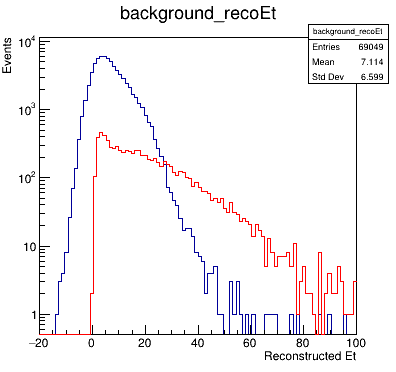

In [14]:
h_background.Draw()
h_signal.Draw('same')
h_signal.SetLineColor(2)
c.SetLogy()
c.Draw()

In [23]:
# Create initial ROC curves
signal_roc_counts = []
background_roc_counters

17232
69049
86281


In [ ]:
neural_network = torch.nn.Sequential(    # the neural network topology:
    torch.nn.Linear(5, 1),               # input → hidden: 2 dimensions → 5 dimensions
    torch.nn.Sigmoid(),                  # non-linearity applied to each of the 5 components
#    torch.nn.Linear(, 1))               # hidden → output: 5 dimensions → 1 dimension

loss_fn = torch.nn.MSELoss(reduction="sum")
optimizer = torch.optim.Adam(neural_network.parameters(), lr=0.001)